# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1, 1.4, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            double_parabolic_params,     
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

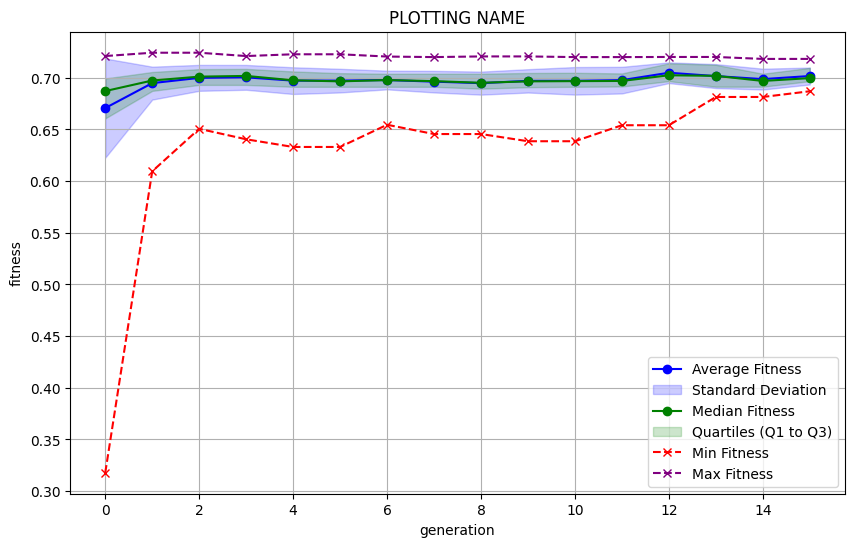

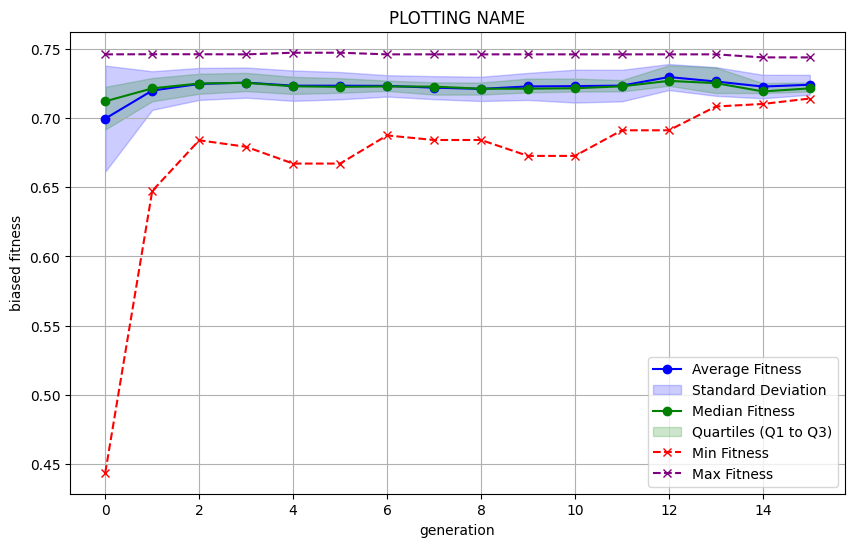

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_214: ['DoubleParabolicShape_15', 'GridStrictTransformation_15']
predict: (0.29025091363125766, 373.3984697000001, 457.8136496999998)
biased_fitness: 0.718074276387423, fitness: 0.6914302666874238
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


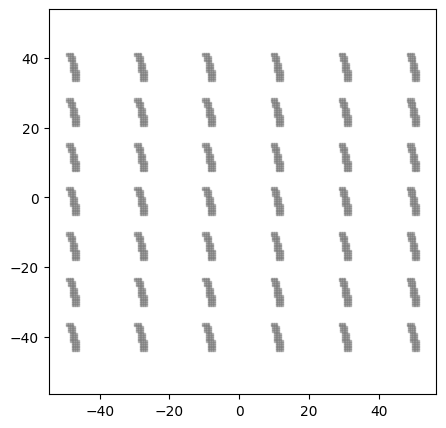

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_435', 'GridStrictTransformation_115']
predict: (0.2908727440099357, 373.09124779999996, 453.1737146999999)
biased_fitness: 0.7232863959006436, fitness: 0.7099477474006438
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


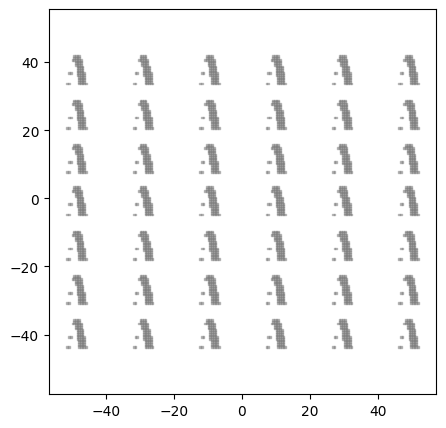

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_171', 'GridStrictTransformation_171']
predict: (0.2908727440099357, 373.09124779999996, 453.1737146999999)
biased_fitness: 0.7232863959006436, fitness: 0.7099477474006438
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


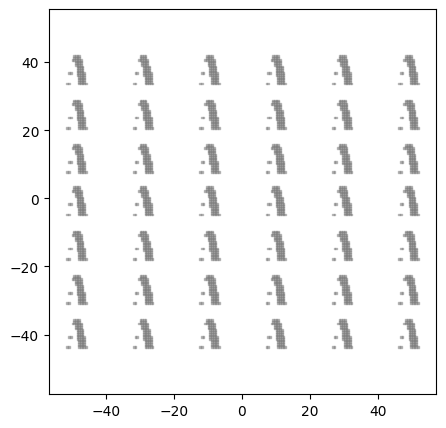

--------------------------------------------------
label: VentHole Chromosome_147: ['DoubleParabolicShape_115', 'GridStrictTransformation_171']
predict: (0.2901374276158344, 373.5237905, 456.25518869999974)
biased_fitness: 0.7214488129416564, fitness: 0.6997308278416573
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


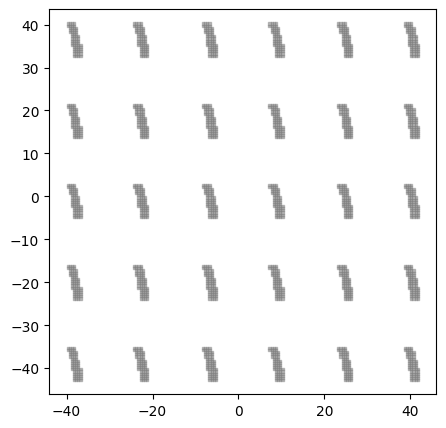

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_147', 'GridStrictTransformation_79']
predict: (0.29028805246022116, 373.56243, 456.46377559999974)
biased_fitness: 0.7192549141977888, fitness: 0.6969884473977896
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


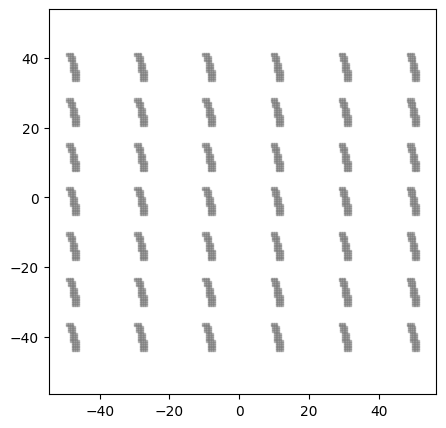

--------------------------------------------------
label: VentHole Chromosome_414: ['DoubleParabolicShape_171', 'GridStrictTransformation_14']
predict: (0.29028805246022116, 373.56243, 456.46377559999974)
biased_fitness: 0.7192549141977888, fitness: 0.6969884473977896
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


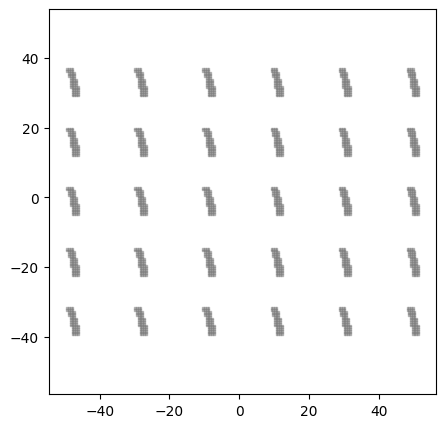

--------------------------------------------------
label: VentHole Chromosome_15: ['DoubleParabolicShape_79', 'GridStrictTransformation_414']
predict: (0.2905622219426469, 373.2816064999999, 456.3109913)
biased_fitness: 0.7187845524735315, fitness: 0.6964147915735313
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


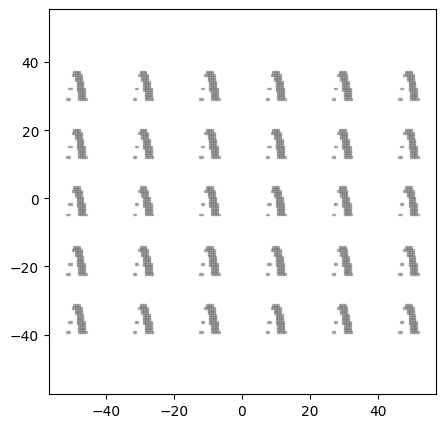

--------------------------------------------------
label: VentHole Chromosome_351: ['DoubleParabolicShape_15', 'GridStrictTransformation_171']
predict: (0.2901420188181816, 373.00496830000003, 455.8994622999999)
biased_fitness: 0.7257461091181839, fitness: 0.7040576588181843
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


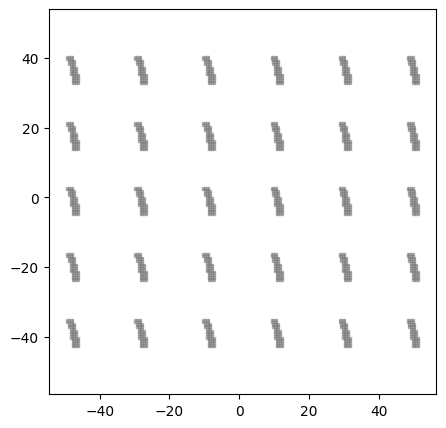

--------------------------------------------------
label: VentHole Chromosome_114: ['DoubleParabolicShape_171', 'GridStrictTransformation_351']
predict: (0.2904768166717395, 373.0853852999998, 458.55759040000004)
biased_fitness: 0.7165189553826058, fitness: 0.6870169547826054
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


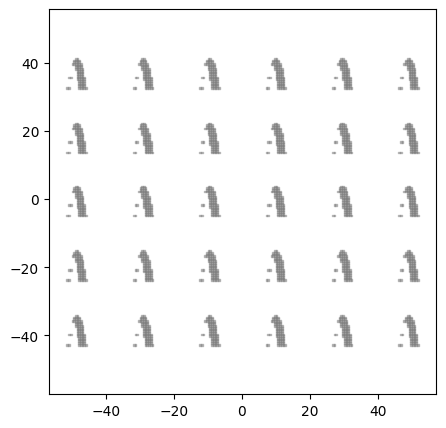

--------------------------------------------------
label: VentHole Chromosome_79: ['DoubleParabolicShape_414', 'GridStrictTransformation_171']
predict: (0.28995011745498234, 373.3308241000001, 457.7863421999999)
biased_fitness: 0.721610372350176, fitness: 0.6949129939501765
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


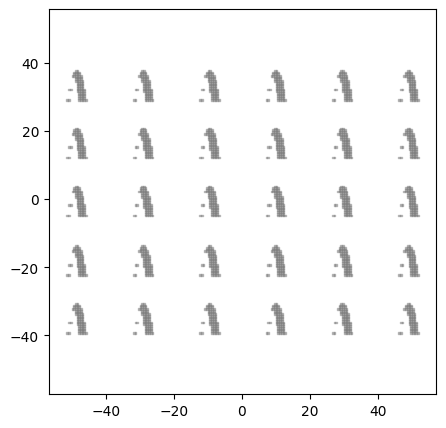

--------------------------------------------------
label: VentHole Chromosome_351: ['WingShape_79', 'GridStrictTransformation_351']
predict: (0.2908168659265238, 372.91187979999995, 455.0047131999999)
biased_fitness: 0.7214387557347625, fitness: 0.7022483757347627
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


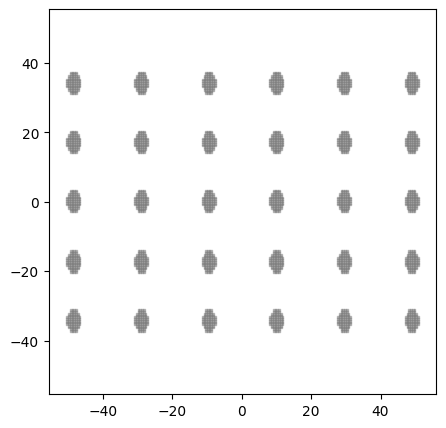

--------------------------------------------------
label: VentHole Chromosome_15: ['WingShape_351', 'GridStrictTransformation_87']
predict: (0.2908168659265238, 372.91187979999995, 455.0047131999999)
biased_fitness: 0.7214387557347625, fitness: 0.7022483757347627
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


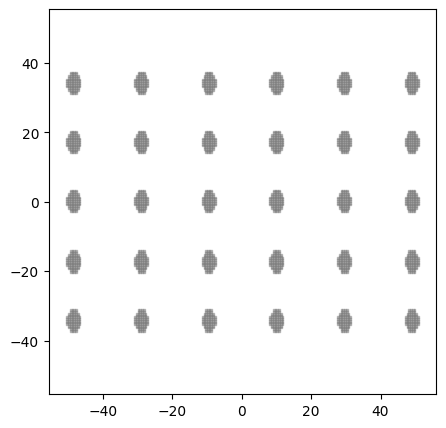

--------------------------------------------------
label: VentHole Chromosome_214: ['WingShape_15', 'GridStrictTransformation_171']
predict: (0.2908168659265238, 372.91187979999995, 455.0047131999999)
biased_fitness: 0.7214387557347625, fitness: 0.7022483757347627
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


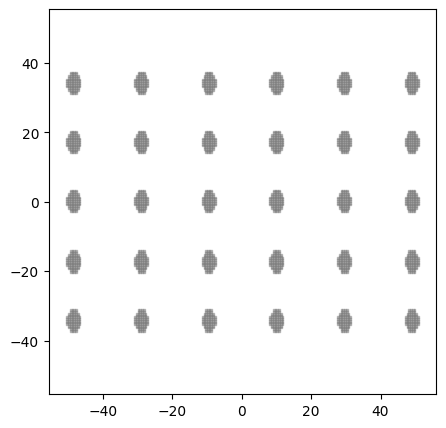

--------------------------------------------------
label: VentHole Chromosome_214: ['WingShape_214', 'GridStrictTransformation_79']
predict: (0.2908615048010792, 373.20130699999993, 457.42282799999987)
biased_fitness: 0.7141301469892085, fitness: 0.6882642769892089
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


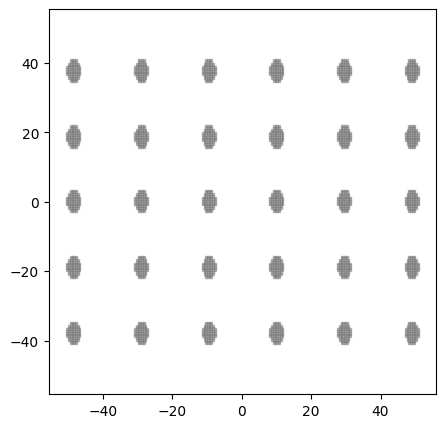

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_351', 'GridStrictTransformation_15']
predict: (0.29025091363125766, 373.3984697000001, 457.8136496999998)
biased_fitness: 0.718074276387423, fitness: 0.6914302666874238
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


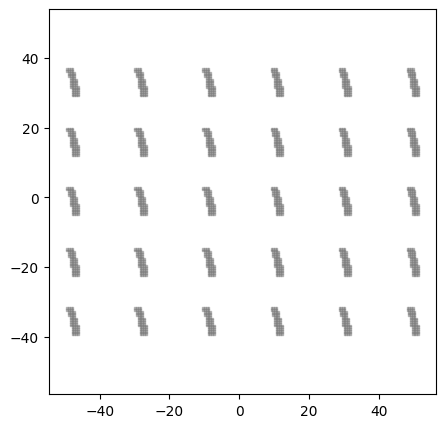

--------------------------------------------------
label: VentHole Chromosome_171: ['CircleShape_232', 'GridStrictTransformation_87']
predict: (0.2907059783742465, 372.904642, 455.9883756)
biased_fitness: 0.7206309710575347, fitness: 0.6984751282575349
shape parameter:
parameter_list: [ r: 2.9377692347103768, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


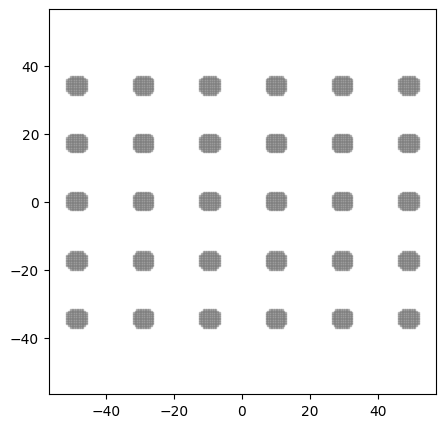

--------------------------------------------------
label: VentHole Chromosome_232: ['WingShape_15', 'GridStrictTransformation_171']
predict: (0.2908168659265238, 372.91187979999995, 455.0047131999999)
biased_fitness: 0.7214387557347625, fitness: 0.7022483757347627
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


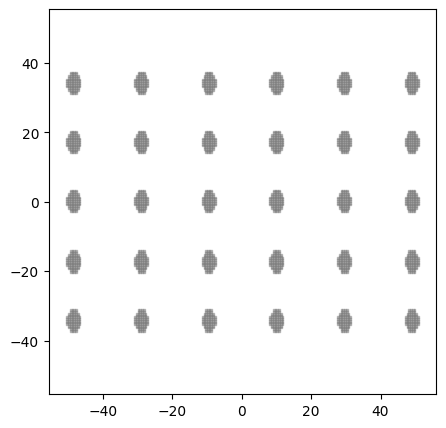

--------------------------------------------------
label: VentHole Chromosome_171: ['RayShape_115', 'GridStrictTransformation_171']
predict: (0.29039067431668397, 372.9719193999999, 457.2515582000001)
biased_fitness: 0.7207867046331609, fitness: 0.6949758688331603
shape parameter:
parameter_list: [ upper_slope: 2.5976433651052844, nose_point: 2.9007738227591693, lower_coefficient: 2.2699543571052767, lower_x-intercept: 1.6210555862126115, lower_y-intercept: 1.3202510178389386, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


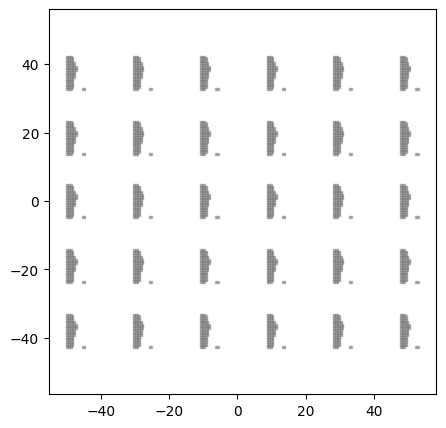

--------------------------------------------------
label: VentHole Chromosome_115: ['DoubleParabolicShape_290', 'GridStrictTransformation_214']
predict: (0.29025091363125766, 373.3984697000001, 457.8136496999998)
biased_fitness: 0.718074276387423, fitness: 0.6914302666874238
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


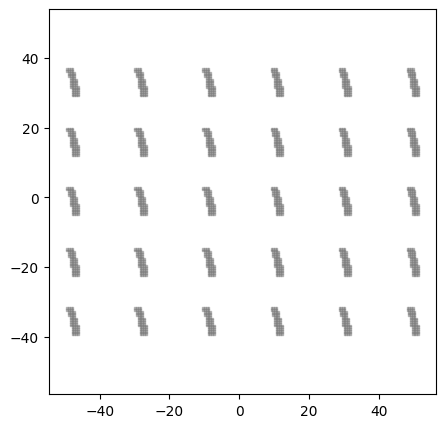

--------------------------------------------------
label: VentHole Chromosome_15: ['RayShape_398', 'GridStrictTransformation_290']
predict: (0.29013411995464344, 373.28803919999996, 456.4445495999999)
biased_fitness: 0.722753426853566, fitness: 0.6999958564535662
shape parameter:
parameter_list: [ upper_slope: 2.5976433651052844, nose_point: 2.9007738227591693, lower_coefficient: 2.2699543571052767, lower_x-intercept: 1.6210555862126115, lower_y-intercept: 1.3202510178389386, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


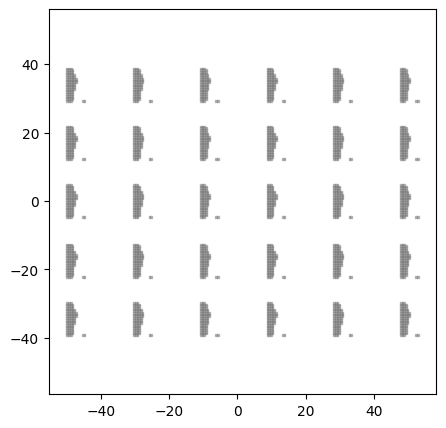

--------------------------------------------------
label: VentHole Chromosome_15: ['DoubleParabolicShape_290', 'GridStrictTransformation_351']
predict: (0.2904768166717395, 373.0853852999998, 458.55759040000004)
biased_fitness: 0.7165189553826058, fitness: 0.6870169547826054
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


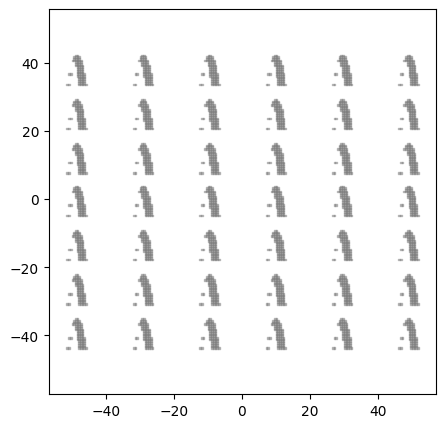

--------------------------------------------------
label: VentHole Chromosome_398: ['CircleShape_14', 'GridStrictTransformation_398']
predict: (0.2907391290656465, 373.296323, 454.1738828999998)
biased_fitness: 0.7211866825435358, fitness: 0.7052576798435363
shape parameter:
parameter_list: [ r: 2.9377692347103768, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


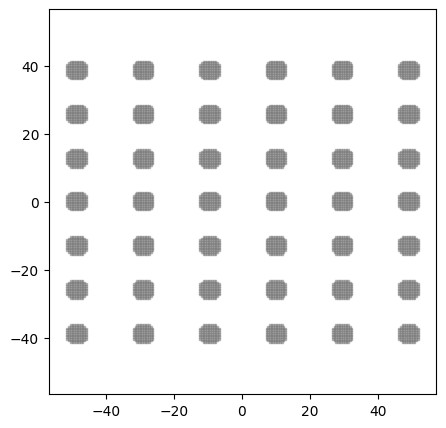

--------------------------------------------------
label: VentHole Chromosome_171: ['CircleShape_398', 'GridStrictTransformation_290']
predict: (0.2907059783742465, 372.904642, 455.9883756)
biased_fitness: 0.7206309710575347, fitness: 0.6984751282575349
shape parameter:
parameter_list: [ r: 2.9377692347103768, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


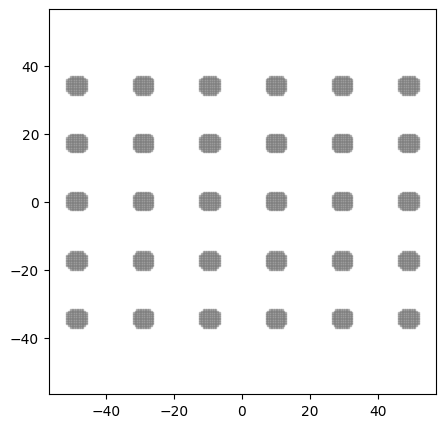

--------------------------------------------------
label: VentHole Chromosome_79: ['WingShape_15', 'GridStrictTransformation_171']
predict: (0.2908168659265238, 372.91187979999995, 455.0047131999999)
biased_fitness: 0.7214387557347625, fitness: 0.7022483757347627
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


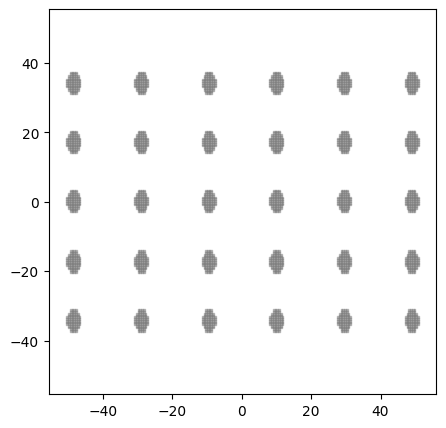

--------------------------------------------------
label: VentHole Chromosome_171: ['DoubleParabolicShape_15', 'GridStrictTransformation_214']
predict: (0.29058910121491954, 373.3284682999999, 456.2301300999999)
biased_fitness: 0.7183494495508054, fitness: 0.6963159958508056
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


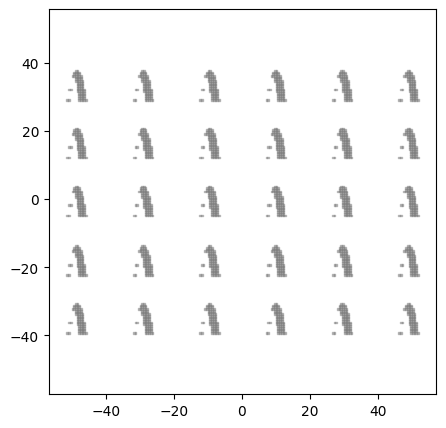

--------------------------------------------------
label: VentHole Chromosome_87: ['DoubleParabolicShape_147', 'GridStrictTransformation_79']
predict: (0.2902266419001309, 373.4173072000001, 457.59457829999985)
biased_fitness: 0.7186232739986902, fitness: 0.6926741534986909
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


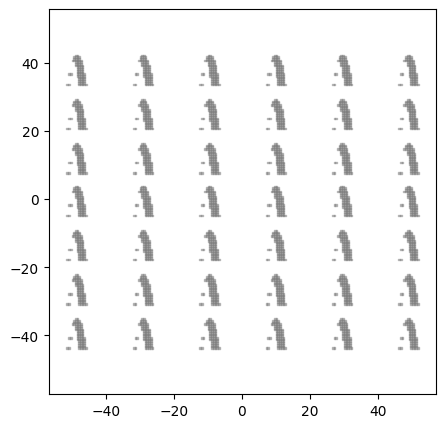

--------------------------------------------------
label: VentHole Chromosome_290: ['RayShape_398', 'GridStrictTransformation_87']
predict: (0.29013411995464344, 373.28803919999996, 456.4445495999999)
biased_fitness: 0.722753426853566, fitness: 0.6999958564535662
shape parameter:
parameter_list: [ upper_slope: 2.5976433651052844, nose_point: 2.9007738227591693, lower_coefficient: 2.2699543571052767, lower_x-intercept: 1.6210555862126115, lower_y-intercept: 1.3202510178389386, ]
pattern parameter:
parameter_list: [ dx: 3.6228888365901115, dy: 7.036857897466891, ]


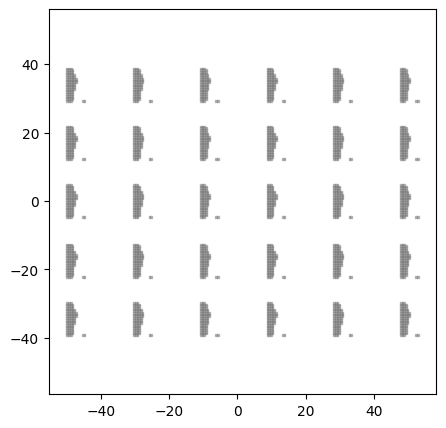

--------------------------------------------------
label: VentHole Chromosome_414: ['DoubleParabolicShape_214', 'GridStrictTransformation_279']
predict: (0.28995011745498234, 373.3308241000001, 457.7863421999999)
biased_fitness: 0.721610372350176, fitness: 0.6949129939501765
shape parameter:
parameter_list: [ lower_coefficient: 2.7832908655900312, upper_coefficient: 1.3096970451122667, lower_y-intercept: 1.862691190032609, upper_y-intercept_from_lower_y: 1.70031693651178, lower_x_trans: 0.815254442574175, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 7.036857897466891, ]


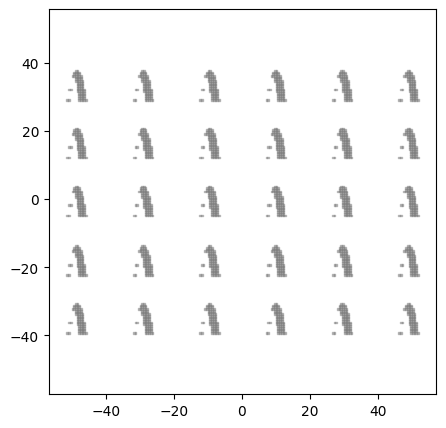

--------------------------------------------------
label: VentHole Chromosome_87: ['WingShape_15', 'GridStrictTransformation_87']
predict: (0.2908444946645963, 373.3665725999999, 455.5857893999998)
biased_fitness: 0.7168174663540381, fitness: 0.6967932433540386
shape parameter:
parameter_list: [ c: 2.445982325756413, ]
pattern parameter:
parameter_list: [ dx: 9.40064668512842, dy: 2.9087355606383327, ]


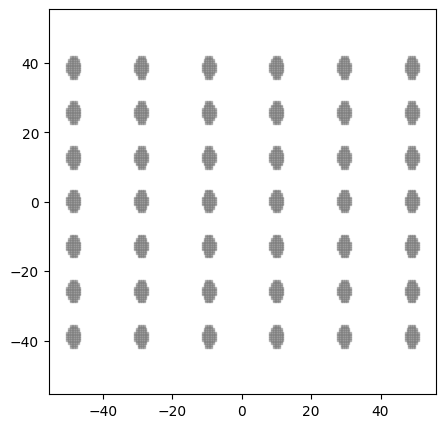

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )